In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('data/df_cleaned.csv')

C:\Users\carlo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (99) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## penultima limpieza

In [3]:
df['gk'] =df['gk'].replace("+","")

In [4]:
df['gk'] = df['gk'].str.replace(r'\+', '', regex=True)


In [5]:
df.gk.fillna(0,inplace=True)

In [6]:
df['gk']=df.gk.astype(int)

In [7]:
df['gk'].unique()

array([15, 16, 14, 17, 87, 34, 13, 18, 85, 83,  8, 84, 12, 82,  9, 11, 80,
       81, 20,  6,  7, 79, 35, 10, 78, 77,  5, 76, 75, 25, 74, 73, 72, 27,
       33, 71, 70, 69, 68, 67, 66, 65, 39, 64, 63, 62, 61, 60, 59,  4, 58,
       57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 43, 19, 37, 21, 38,
       23, 22, 29, 31, 28, 32, 44, 89, 86, 45, 90, 88, 24,  0])

## Añadir variable años pendientes de contrato

In [27]:
df['años_de_contrato']=np.where((df['club_contract_valid_until']-df['año_version'])<0,0,(df['club_contract_valid_until']-df['año_version']))

In [30]:
#comprobación
df.groupby('años_de_contrato')['años_de_contrato'].count()

años_de_contrato
0.0    30707
1.0    21182
2.0    17779
3.0     9287
4.0     4872
5.0     2502
6.0     1413
7.0        3
8.0        2
Name: años_de_contrato, dtype: int64

## Agrupar columna bodytype

In [49]:
Lean=['Lean (170-)','Lean (185+)','Lean (170-185)']
Normal=['Normal (170-)','Normal (170-185)','Normal (185+)']
Stocky=['Stocky (170-)','Stocky (170-185)','Stocky (185+)']

In [50]:
#agrupo posiciones en posiciones genéricas    
for i in df.index:
    if df.at[i,'body_type'] in Lean:
        df.at[i,'body_type']='Lean'
    elif df.at[i,'body_type'] in Normal:
        df.at[i,'body_type']='Normal'
    elif df.at[i,'body_type'] in Stocky:
        df.at[i,'body_type']='Stocky'
    else:
        pass

## feature engineering

In [37]:
df.preferred_foot.value_counts() #categorica a OHE

Right    66970
Left     20777
Name: preferred_foot, dtype: int64

In [41]:
df.work_rate.value_counts() #categorica transformarla con un ordinal encoder

Medium/Medium    47248
High/Medium      15911
Medium/High       8196
High/High         4712
Medium/Low        4072
High/Low          3332
Low/Medium        2078
Low/High          2058
Low/Low            140
Name: work_rate, dtype: int64

In [51]:
df.body_type.value_counts() #Transformar la variable de más a menos mosculado con un ordinal encoder
#(Lean < Normal < Stocky) + Unique = -1
#oe_cat = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1, categories=[unique_categories for _ in ["columns", "you", "want"]])

Normal    51581
Lean      30898
Stocky     5099
Unique      169
Name: body_type, dtype: int64

In [46]:
df.real_face.value_counts() #categorica a OHE

No     78885
Yes     8862
Name: real_face, dtype: int64

In [52]:
df.año_version.value_counts() #categorica a OHE

2021    13300
2020    13275
2019    13194
2018    12689
2017    12607
2016    11442
2015    11240
Name: año_version, dtype: int64

In [54]:
df.player_positions.value_counts() #categorica a OHE

centrocampista    36424
defensa           29039
delantero         12650
portero            9634
Name: player_positions, dtype: int64

In [55]:
#ver todas las variables 
pd.set_option('display.max_columns', None)
print(df.columns.tolist())

['sofifa_id', 'short_name', 'long_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'club_team_id', 'club_name', 'league_name', 'league_level', 'club_position', 'club_jersey_number', 'club_joined', 'club_contract_valid_until', 'nationality_id', 'nationality_name', 'nation_team_id', 'nation_position', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentalit

In [56]:
#eliminamos columnas que sabemos seguro que sólo aportan ruido
df.drop(["sofifa_id",'short_name', 'long_name',"nationality_id","dob",'club_team_id', 'club_name', 'league_name',
        'club_jersey_number', 'club_joined', 'club_contract_valid_until','nationality_id', 'nationality_name','player_traits',
        'ranking','puntos'],axis=1,inplace=True)

## Examinar correlaciones entre variables

In [90]:
c = df.select_dtypes('number').corr().abs()

s = c.unstack()
so = s[s<1].sort_values(kind="quicksort")
#so.shape
print(so[so>0.90])

attacking_crossing  rm                    0.900379
                    lm                    0.900379
lm                  attacking_crossing    0.900379
rm                  attacking_crossing    0.900379
skill_long_passing  lcm                   0.900648
                                            ...   
rm                  rw                    0.994461
lw                  lm                    0.994461
rm                  lw                    0.994461
lm                  rw                    0.994461
rw                  lm                    0.994461
Length: 630, dtype: float64


In [105]:
df_corr=so.to_frame(name='correlacion')

In [106]:
df_corr=df_corr[df_corr['correlacion']>0.90].reset_index().rename(columns={'level_0':'variable_1','level_1':'variable_2'})

In [110]:
df_corr #Hay una alta coliniaridad entre 630 combinaciones de variables

,variable_1,variable_2,correlacion
0,attacking_crossing,rm,0.900379
1,attacking_crossing,lm,0.900379
2,lm,attacking_crossing,0.900379
3,rm,attacking_crossing,0.900379
4,skill_long_passing,lcm,0.900648
...,...,...,...
625,rm,rw,0.994461
626,lw,lm,0.994461
627,rm,lw,0.994461
628,lm,rw,0.994461


<AxesSubplot:>

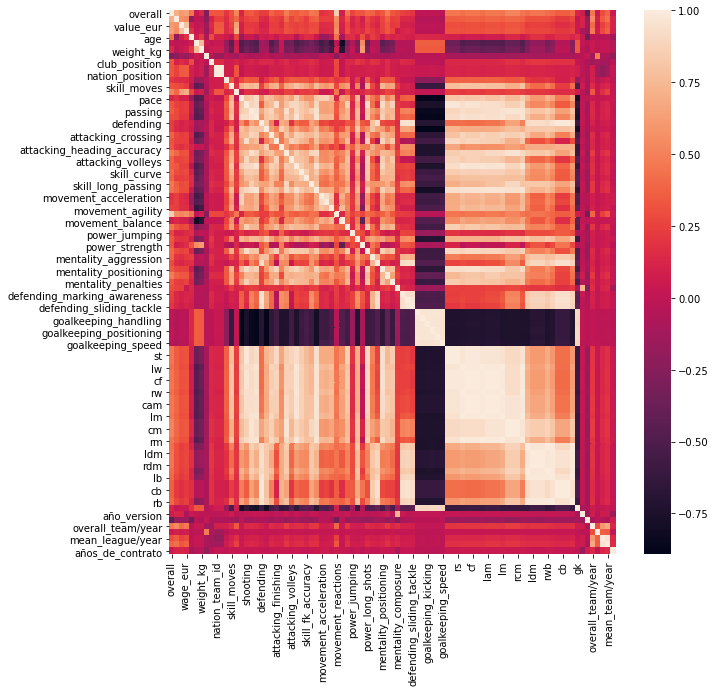

In [69]:
plt.rcParams['figure.figsize'] = (10,10)
sns.heatmap(df.select_dtypes('number').corr())

In [ ]:
#transformar a variables numéricas las variables categóricas
#balancear modelo

## Creación de pipeline

In [115]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [148]:
work_rate_ord=['Low/Low','Low/Medium','Low/High','Medium/Low','Medium/Medium','Medium/High','High/Low','High/Medium','High/High']
league_level_ord=['0.0','4.0','3.0','2.0','1.0']
#body_type_ord=['Lean','Normal','Stocky'] con OHE

In [138]:
df['league_level']=df['league_level'].apply(str)

In [149]:
#definimos X e y
X=df.drop('progresion_anual',axis=1)
y=df['progresion_anual']

In [150]:
feature_engineering=make_column_transformer((OrdinalEncoder(categories=[work_rate_ord,league_level_ord]),['work_rate','league_level']),
                                            (OneHotEncoder(drop='first'),['preferred_foot','body_type','player_positions','real_face','año_version',
                                                                     'club_position','nation_team_id','nation_position']),
                                            (StandardScaler(),  X.select_dtypes('number').drop(['año_version','club_position','nation_team_id','nation_position'],axis=1).columns) 
                                           )

In [131]:
OneHotEncoder(drop='first',sparse=False).fit_transform(df[['preferred_foot','body_type','player_positions','real_face','año_version',
                                                                     'club_position','nation_team_id','nation_position']])

array([[0., 1., 0., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       [0., 1., 0., ..., 0., 1., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [151]:
#comprobación
X.select_dtypes('number').drop(['año_version','club_position','nation_team_id','nation_position'],axis=1)

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,overall_team/year,teams_in_league/year,mean_league/year,mean_team/year,años_de_contrato
0,93,95,100500000.0,550000.0,27,169,67,3,4,5,93.0,89.0,86.0,96.0,27.0,63.0,84,94,71,89,85,96,89,90,76,96,96,90,94,94,95,80,73,77,60,88,48,22,92,90,76,0.0,25,21,20,6,11,15,14,8,0.0,89,89,89,92,90,90,90,92,92,92,92,90,79,79,79,90,62,62,62,62,62,54,45,45,45,54,15,1917.0,20.0,71.357143,79.875000,3.0
1,92,92,79000000.0,375000.0,29,185,80,4,5,5,93.0,93.0,81.0,91.0,32.0,79.0,83,95,86,82,87,93,88,79,72,92,91,94,93,90,63,94,94,89,79,93,63,24,91,81,85,0.0,22,31,23,7,11,15,14,11,0.0,91,91,91,89,91,91,91,89,89,89,89,87,77,77,77,87,63,63,63,63,63,57,52,52,52,57,16,2418.0,20.0,71.357143,75.562500,3.0
2,90,90,54500000.0,275000.0,30,180,80,2,4,5,93.0,86.0,83.0,92.0,32.0,64.0,80,85,50,86,86,93,85,83,76,90,93,93,93,89,91,86,61,78,65,90,47,39,89,84,80,0.0,29,26,26,10,8,11,5,15,0.0,84,84,84,88,87,87,87,88,88,88,88,87,78,78,78,87,64,64,64,64,64,55,46,46,46,55,14,2061.0,18.0,71.280514,79.269231,2.0
3,90,90,52500000.0,275000.0,32,195,95,4,4,5,76.0,91.0,81.0,86.0,34.0,86.0,76,91,76,84,92,88,80,80,76,90,74,77,86,85,41,93,72,78,93,88,84,20,86,83,91,0.0,25,41,27,13,15,10,9,12,0.0,87,87,87,84,86,86,86,84,86,86,86,83,76,76,76,83,61,65,65,65,61,56,55,55,55,56,17,1730.0,20.0,69.209644,78.636364,1.0
4,90,90,63500000.0,300000.0,28,193,92,4,1,5,0.0,0.0,0.0,0.0,0.0,0.0,25,25,25,42,25,25,25,25,41,31,58,61,43,89,35,42,78,44,83,25,29,30,25,20,37,0.0,25,25,25,87,85,92,90,86,60.0,38,38,38,36,37,37,37,36,36,36,36,38,36,36,36,38,36,40,40,40,36,36,38,38,38,36,87,2061.0,18.0,71.280514,79.269231,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87742,47,57,100000.0,2000.0,20,175,69,3,2,1,58.0,49.0,41.0,49.0,30.0,44.0,45,52,34,42,42,51,35,31,31,46,62,55,50,33,54,56,45,46,48,40,31,25,42,46,46,45.0,26,32,42,14,12,9,8,12,0.0,46,46,46,47,47,47,47,47,45,45,45,46,41,41,41,46,40,36,36,36,40,39,35,35,35,39,0,1473.0,16.0,62.216301,61.375000,3.0
87743,47,51,60000.0,1000.0,20,185,74,2,2,1,51.0,25.0,29.0,36.0,45.0,55.0,20,20,46,40,22,35,20,25,25,30,54,49,40,45,57,35,69,58,55,22,46,45,25,25,35,40.0,36,55,45,12,9,14,15,13,0.0,34,34,34,33,33,33,33,33,33,33,33,35,35,35,35,35,42,42,42,42,42,44,47,47,47,44,0,1234.0,16.0,62.216301,58.761905,1.0
87744,47,53,70000.0,1000.0,20,181,77,2,2,1,59.0,22.0,25.0,30.0,47.0,55.0,22,18,46,24,24,23,27,21,24,28,61,57,48,41,61,32,68,60,58,15,40,44,24,33,35,37.0,41,52,55,10,15,12,8,13,0.0,32,32,32,30,30,30,30,30,29,29,29,32,31,31,31,32,42,40,40,40,42,45,47,47,47,45,0,1057.0,16.0,62.216301,58.722222,1.0
87745,47,47,45000.0,2000.0,28,185,79,2,2,1,65.0,37.0,49.0,46.0,40.0,59.0,44,32,44,56,35,46,37,33,56,43,67,64,56,44,55,49,59,54,62,34,57,35,48,44,36,35.0,38,43,45,8,5,11,5,7,0.0,46,46,46,47,46,46,46,47,47,47,47,49,47,47,47,49,47,47,47,47,47,47,46,46,46,47,0,1234.0,1

In [125]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [180]:
#creamos un pipeline
pipe = make_pipeline(feature_engineering, Ridge())

In [181]:
pipe.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Low/Low',
                                                                              'Low/Medium',
                                                                              'Low/High',
                                                                              'Medium/Low',
                                                                              'Medium/Medium',
                                                                              'Medium/High',
                                                                              'High/Low',
                                                                              'High/Medium',
                                                                              'High/High'],
                                                                    

In [182]:
pipe.score(X,y)

0.2909773375273508

In [177]:
from sklearn.model_selection import GridSearchCV

In [183]:
params={'ridge__alpha':10.0**np.arange(-3,3)}

In [184]:
model=GridSearchCV(pipe, param_grid=params, cv=5) .fit(X,y)

C:\Users\carlo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carlo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\carlo\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "C:\Users\carlo\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "C:\Users\carlo\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

C:\Users\carlo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carlo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\carlo\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "C:\Users\carlo\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "C:\Users\carlo\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

C:\Users\carlo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carlo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\carlo\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "C:\Users\carlo\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "C:\Users\carlo\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

C:\Users\carlo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carlo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\carlo\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "C:\Users\carlo\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "C:\Users\carlo\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

C:\Users\carlo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carlo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\carlo\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "C:\Users\carlo\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "C:\Users\carlo\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

C:\Users\carlo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carlo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\carlo\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "C:\Users\carlo\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "C:\Users\carlo\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_trans

In [185]:
model.best_params_

{'ridge__alpha': 0.001}

In [187]:
model.best_estimator_.fit(X,y).score(X,y)

0.2909775724590804

## modelo (con pruebas)

In [67]:
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import ensemble



In [22]:
from sklearn.metrics import classification_report
target=[]
#elegimos el % de target para que sea 0 y 1
for i in df.progresion_anual:
    if i>0.1:
        target.append(1)
    else:
        target.append(0)
df["target"]=target


In [75]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']


In [76]:
#elegir la X
X=df.select_dtypes(include=numerics).drop(["progresion_anual","sofifa_id","nationality_id","target"],axis=1)
y=df.progresion_anual
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=42)

In [78]:
model3.feature_importances_

array([2.06857933e-01, 1.16693313e-02, 1.43372474e-02, 9.57834408e-03,
       4.63778336e-02, 1.11362027e-02, 1.28330201e-02, 1.87027971e-02,
       3.36045202e-03, 1.82141647e-02, 1.74471417e-02, 8.66400345e-03,
       1.63142329e-04, 5.07468521e-04, 2.55641290e-03, 1.34184015e-03,
       4.26614859e-04, 6.39100689e-03, 4.83956162e-03, 4.85598237e-03,
       3.98974019e-03, 3.41503336e-03, 9.01074154e-03, 1.09556415e-02,
       8.01096909e-03, 1.19866590e-02, 7.69596502e-03, 8.22565566e-03,
       7.61142445e-03, 1.11685422e-02, 1.01376428e-02, 1.06789877e-02,
       7.62091720e-03, 1.02238540e-02, 8.96999283e-03, 1.28452425e-02,
       1.42657393e-02, 1.16099281e-02, 1.20731865e-02, 1.46512331e-02,
       1.03621973e-02, 1.42434021e-02, 8.60734323e-03, 1.32814132e-02,
       1.00901100e-02, 9.30308765e-03, 1.06581792e-02, 1.17744175e-02,
       3.10202268e-02, 9.58960829e-03, 6.41685602e-03, 9.05237137e-03,
       9.26430102e-03, 9.84850122e-03, 1.03635117e-02, 8.90266135e-03,
      

In [80]:
model4=ensemble.RandomForestRegressor().fit(X_train,y_train)

In [77]:
#modelo 1
model3=DecisionTreeRegressor().fit(X_train,y_train)
#y_pred=model2.predict(X_test)
#print(classification_report(y_test, y_pred))

In [50]:
y_pred=model2.predict(X_test)

In [69]:
model4.score(X_test,y_test)

0.2735860463467571

In [71]:
model4.score(X_train,y_train)

0.9006360298817907

In [72]:
import graphviz

ModuleNotFoundError: No module named 'graphviz'

In [57]:
import seaborn as sns

<AxesSubplot:>

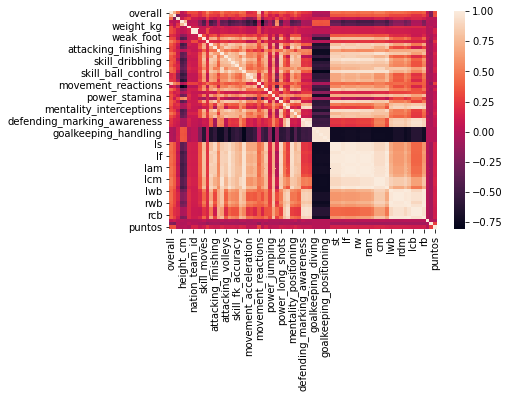

In [59]:
sns.heatmap(X.corr())

In [53]:
X_train.columns

Index(['overall', 'potential', 'age', 'height_cm', 'weight_kg',
       'club_position', 'nation_team_id', 'nation_position', 'weak_foot',
       'skill_moves', 'international_reputation', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking_awareness', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning',

In [74]:
df[df.isnumeric()]

AttributeError: 'DataFrame' object has no attribute 'isnumeric'

In [73]:
df.select_dtypes(float).columns

Index(['value_eur', 'wage_eur', 'club_team_id', 'league_level',
       'club_jersey_number', 'club_contract_valid_until', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'mentality_composure',
       'goalkeeping_speed', 'progresion_anual', 'overall_team/year',
       'teams_in_league/year', 'mean_league/year', 'mean_team/year'],
      dtype='object')

In [25]:
#modelo 2
model=svm.SVC()
model.fit(X_train,y_train).score(X_test,y_test)
y_pred=model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     12529
           1       0.00      0.00      0.00       634

    accuracy                           0.95     13163
   macro avg       0.48      0.50      0.49     13163
weighted avg       0.91      0.95      0.93     13163



C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
